# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

In [38]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [14]:
# Usar o patsy para criar as variáveis dummy, mantendo a categoria mais frequente como referência
formula = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia'
y, X = patsy.dmatrices(formula, df, return_type='dataframe')

In [16]:
# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:36:59   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [24]:
# Ajustar o modelo inicial
formula = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia'
y, X = patsy.dmatrices(formula, df, return_type='dataframe')
model = sm.OLS(y, X).fit()
print(model.summary())

# Iterativamente remover variáveis menos significativas
while True:
    # Identificar a variável com maior p-valor
    pvalues = model.pvalues
    max_pvalue = pvalues.max()
    if max_pvalue < 0.05:
        break  # Parar se todas as variáveis forem significativas
    
    # Remover a variável com maior p-valor da fórmula
    variable_to_remove = pvalues.idxmax()
    formula = formula.replace(f"+ {variable_to_remove}", "")
    
    # Ajustar o novo modelo
    y, X = patsy.dmatrices(formula, df, return_type='dataframe')
    model = sm.OLS(y, X).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:41:50   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

KeyboardInterrupt: 

In [25]:
df2 = df.copy()

In [26]:
y, x = patsy.dmatrices('''np.log(renda) ~ C(sexo, Treatment(0))
                               + C(posse_de_veiculo, Treatment(0))  
                               + C(posse_de_imovel, Treatment(0))
                               + C(tipo_renda, Treatment(1))
                               + C(educacao, Treatment(1))
                               + C(estado_civil, Treatment(1))
                               + C(tipo_residencia, Treatment(1))                                                           
                               + C(qtd_filhos, Treatment(2))    
                               + idade
                               + tempo_emprego
                               + C(qt_pessoas_residencia, Treatment(2))    
                       ''', data = df2)

In [30]:
#coef = Estimativa Beta, 
#std err = erro padrao do Beta, 
#t = estatistica t-estimativa/erro padrao 
#P>|t| = P-value: probabilidade de observarmos um novo Beta chapeu sob H0, menos provavel que a estimativa atual
#[0.025	0.975] = Podemos dizer, com 95% de confianca, que o verdadeiro valor do parametro esta dentro desse intervalo

sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     203.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                -13559.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12392   BIC:                         2.745e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1838      0.312     23.053      0.000       6.573       7.795
C(sexo, Treatment(0))[T.M]                            0.7878      0.015     53.664      0.000       0.759       0.817
C(posse_de_veiculo, Treatment(0))[T.True]             0.0436      0.014      3.079      0.002       0.016       0.071
C(posse_de_imovel, Treatment(0))[T.True]              0.0828      0.014      5.907      0.000       0.055       0.110
C(tipo_renda, Treatment(1))[T.Assalariado]           -0.2259      0.241     -0.937      0.349      -0.699       0.247
C(tipo_renda, Treatment(1))[T.Empresário]            -0.0712      0.241     -0.295      0.768      -0.544       0.402
C(tipo_renda, Treatment(1))[T.Pensionista]           -0.5150      0.342     -1.506      0.132      -1.185       0.155
C(tipo_renda, Treatment(1))[T.Servidor público]      -0.1709      0.242     -0.707      0.480      -0.645       0.303
C(educacao, Treatment(1))[T.Primário]                -0.1038      0.159     -0.652      0.515      -0.416       0.208
C(educacao, Treatment(1))[T.Secundário]              -0.1168      0.142     -0.821      0.412      -0.396       0.162
C(educacao, Treatment(1))[T.Superior completo]       -0.0099      0.142     -0.070      0.944      -0.289       0.269
C(educacao, Treatment(1))[T.Superior incompleto]     -0.1458      0.145     -1.002      0.316      -0.431       0.139
C(estado_civil, Treatment(1))[T.Casado]              -0.3176      0.112     -2.831      0.005      -0.537      -0.098
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0619      0.033     -1.862      0.063      -0.127       0.003
C(estado_civil, Treatment(1))[T.União]               -0.3516      0.114     -3.076      0.002      -0.576      -0.128
C(estado_civil, Treatment(1))[T.Viúvo]                0.0360      0.049      0.733      0.463      -0.060       0.132
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0424      0.054      0.784      0.433      -0.064       0.149
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0191      0.029      0.649      0.516      -0.039       0.077
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0753      0.092     -0.820      0.412      -0.255       0.105
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1076      0.084      1.281      0.200      -0.057       0.272
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0121      0.039     -0.311      0.756      -0.089       0.064
C(qtd_filhos, Treatment(2))[T.0]                      0.5697      0.223      2.559      0.011       0.133       1.006
C(qtd_filhos, Treatment(2))[T.1]                      0.3196      0.130      2.464      0.014       0.065       0.574
C(qtd_filhos, T

In [42]:
df2.loc[df2['qtd_filhos']>=3, 'qtd_filhos'] = '3+'
df2['qtd_filhos'].value_counts()

C:\Users\morid\AppData\Local\Temp\ipykernel_20400\3716542696.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['qtd_filhos']>=3, 'qtd_filhos'] = '3+'


qtd_filhos
0     10376
1      3037
2      1376
3+      211
Name: count, dtype: int64

In [44]:
df2.loc[df2['qt_pessoas_residencia']>=4, 'qt_pessoas_residencia'] = '4+'
df2['qt_pessoas_residencia'].value_counts()

C:\Users\morid\AppData\Local\Temp\ipykernel_20400\3900857054.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4+' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['qt_pessoas_residencia']>=4, 'qt_pessoas_residencia'] = '4+'


qt_pessoas_residencia
2.0    8181
1.0    2752
3.0    2551
4+     1516
Name: count, dtype: int64

C:\Users\morid\AppData\Local\Temp\ipykernel_20400\3876664463.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  qtd_filhos.set_xticklabels(qtd_filhos.get_xticklabels(), rotation=90, horizontalalignment='right')
C:\Users\morid\AppData\Local\Temp\ipykernel_20400\3876664463.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  qt_pessoas_residencia.set_xticklabels(qt_pessoas_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


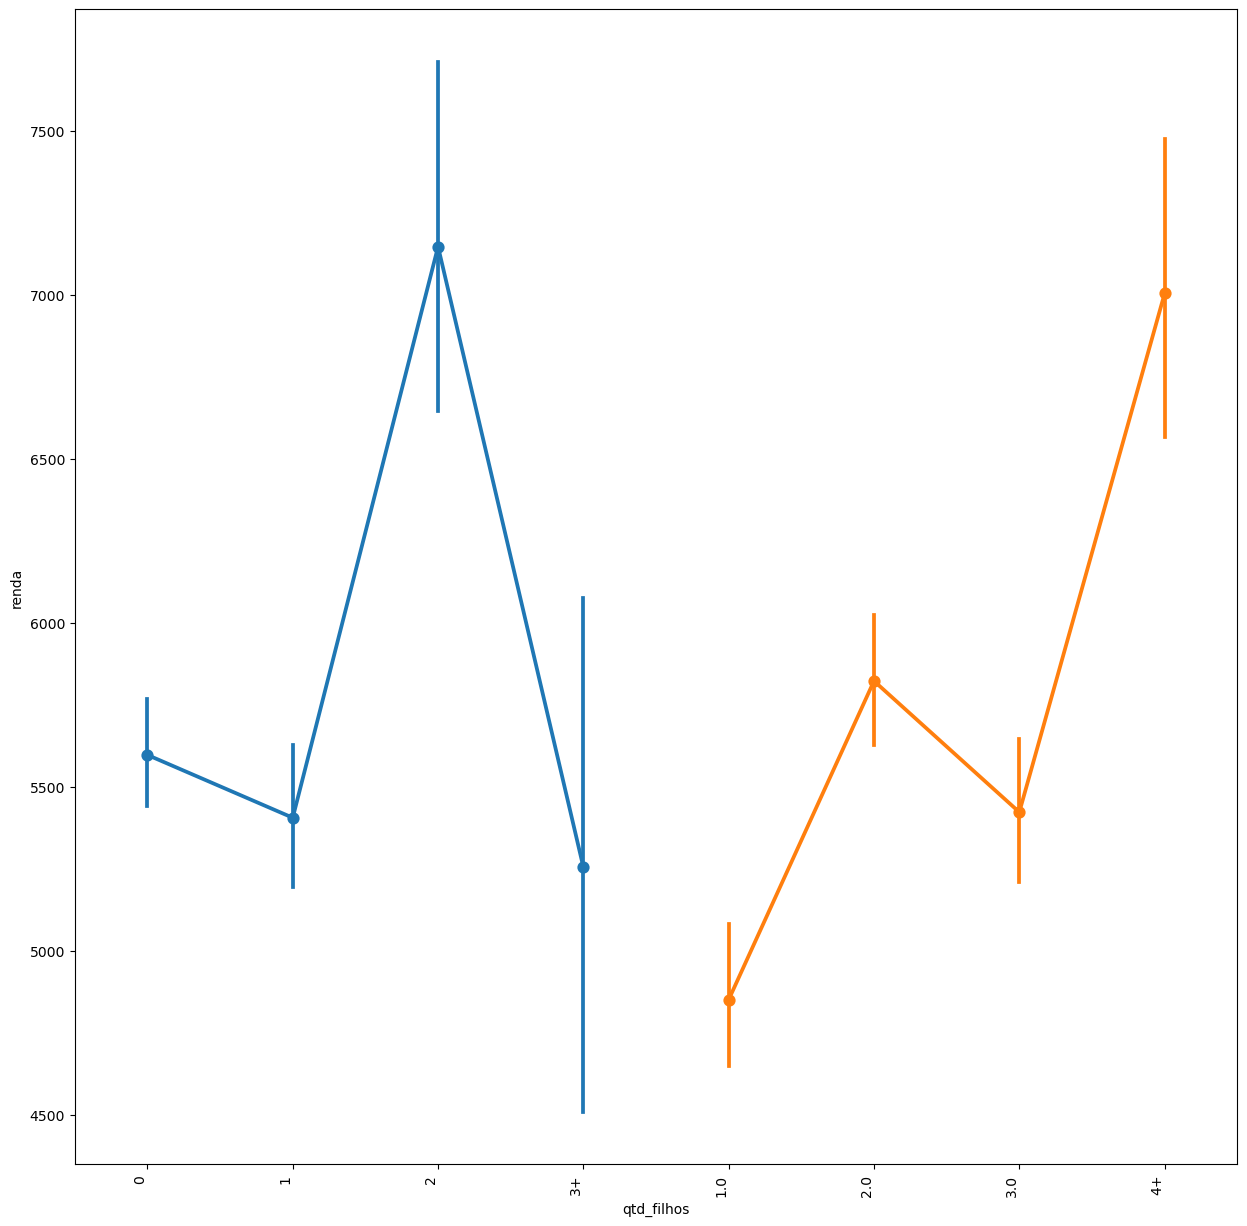

In [46]:
plt.close('all')

plt.rc('figure', figsize=(15, 15))

qtd_filhos = sns.pointplot(y = 'renda', x = 'qtd_filhos', data = df2)
qt_pessoas_residencia = sns.pointplot(y = 'renda', x = 'qt_pessoas_residencia', data = df2)

qtd_filhos.set_xticklabels(qtd_filhos.get_xticklabels(), rotation=90, horizontalalignment='right')
qt_pessoas_residencia.set_xticklabels(qt_pessoas_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.15, hspace=0.5)